In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# IMDB Data Set

df_basics = pd.read_csv('title_basics_2018.csv')
df_basics.head(10)
df_basics.info()
df_basics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12815 entries, 0 to 12814
Data columns (total 6 columns):
tconst            12815 non-null object
primaryTitle      12815 non-null object
originalTitle     12815 non-null object
year              12815 non-null int64
runtimeMinutes    12815 non-null int64
genres            12815 non-null object
dtypes: int64(2), object(4)
memory usage: 600.8+ KB


,year,runtimeMinutes
count,12815.0,12815.000000
mean,2018.0,87.887163
std,0.0,33.998296
min,2018.0,1.000000
25%,2018.0,73.000000
50%,2018.0,89.000000
75%,2018.0,101.000000
max,2018.0,1320.000000


In [40]:
df_rating = pd.read_csv('title_ratings.csv')
df_rating.head()
df_rating.info()
df_rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985459 entries, 0 to 985458
Data columns (total 3 columns):
tconst           985459 non-null object
averageRating    985459 non-null float64
numVotes         985459 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.6+ MB


,averageRating,numVotes
count,985459.000000,9.854590e+05
mean,6.886208,9.577535e+02
std,1.401076,1.565533e+04
min,1.000000,5.000000e+00
25%,6.100000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.600000e+01
max,10.000000,2.151694e+06


In [30]:

# question a):

mask = df_basics['genres'].str.contains('Comedy')

'According to the provided dataset, {} 2018 films were categorized as a Comedy'.format(np.sum(mask))

'According to the provided dataset, 2233 2018 films were categorized as a Comedy'

In [38]:
# question b):

all_info = pd.merge(df_basics,df_rating, on='tconst', how='inner')
all_info.head(10)
all_info.describe()

,year,runtimeMinutes,averageRating,numVotes
count,7229.0,7229.000000,7229.000000,7229.000000
mean,2018.0,96.271130,6.246217,2588.912989
std,0.0,27.400867,1.494149,19831.779889
min,2018.0,7.000000,1.000000,5.000000
25%,2018.0,83.000000,5.400000,18.000000
50%,2018.0,93.000000,6.400000,69.000000
75%,2018.0,106.000000,7.300000,346.000000
max,2018.0,840.000000,10.000000,719146.000000


In [32]:
mask_two = all_info['averageRating'] >= 8.0
'According to the provided dataset, {} 2018 films got a score of 8.0 or higher'.format(np.sum(mask_two))

'According to the provided dataset, 780 2018 films got a score of 8.0 or higher'

In [34]:
# question c):
best = all_info.loc[all_info['averageRating'].idxmax()]
'{} was the best film of 2018'.format(best['primaryTitle'])

'Exteriores: Mulheres Brasileiras na Diplomacia was the best film of 2018'

In [99]:
# question d):
bins = np.linspace(all_info['runtimeMinutes'].min(), all_info['runtimeMinutes'].max(), 15)
bins

array([  7. ,  66.5, 126. , 185.5, 245. , 304.5, 364. , 423.5, 483. ,
       542.5, 602. , 661.5, 721. , 780.5, 840. ])

In [114]:
groups = all_info.groupby(np.digitize(all_info['runtimeMinutes'], bins))
# runtime
groups['runtimeMinutes'].describe()

,count,mean,std,min,25%,50%,75%,max
1,486.0,54.144033,11.601095,7.0,50.00,57.0,62.00,66.0
2,6063.0,93.897246,13.225321,67.0,85.00,92.0,102.00,125.0
3,651.0,141.021505,12.036719,126.0,132.00,138.0,148.00,182.0
4,20.0,213.900000,19.401302,188.0,196.00,215.0,230.75,244.0
5,4.0,256.000000,6.377042,247.0,253.75,258.0,260.25,261.0
8,1.0,480.000000,NaN,480.0,480.00,480.0,480.00,480.0
9,1.0,495.000000,NaN,495.0,495.00,495.0,495.00,495.0
10,1.0,601.000000,NaN,601.0,601.00,601.0,601.00,601.0
14,1.0,808.000000,NaN,808.0,808.00,808.0,808.00,808.0
15,1.0,840.000000,NaN,840.0,840.00,840.0,840.00,840.0


In [113]:
# averagerating
groups['averageRating'].describe()


,count,mean,std,min,25%,50%,75%,max
1,486.0,6.815021,1.630445,1.0,6.000,7.10,7.900,10.0
2,6063.0,6.167607,1.484841,1.0,5.300,6.30,7.200,9.8
3,651.0,6.494470,1.340379,1.5,5.700,6.60,7.400,9.5
4,20.0,7.525000,1.059729,5.4,6.975,7.65,8.225,9.2
5,4.0,7.700000,1.288410,6.0,7.125,7.90,8.475,9.0
8,1.0,7.000000,NaN,7.0,7.000,7.00,7.000,7.0
9,1.0,8.400000,NaN,8.4,8.400,8.40,8.400,8.4
10,1.0,8.000000,NaN,8.0,8.000,8.00,8.000,8.0
14,1.0,7.900000,NaN,7.9,7.900,7.90,7.900,7.9
15,1.0,7.100000,NaN,7.1,7.100,7.10,7.100,7.1


In [112]:
# total numVotes
groups['numVotes'].sum()

1        16489
2     12079191
3      6590111
4        28809
5          289
8            7
9          117
10          24
14         204
15          11
Name: numVotes, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016517E4A438>]],
      dtype=object)

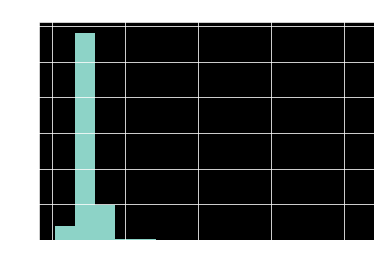

In [98]:
# plot hist
all_info.hist(column='runtimeMinutes',bins=15)

In [ ]:
'Audiences prefer shorter films (<185 mins).  1. most numbers of files (6063+651+486) last less than 185 mins. 2. They also have most number of votes (indicate more interesting).'